In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

In [2]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [3]:
from flair.embeddings import TransformerWordEmbeddings

model_name = "bert-base-uncased"

params = {
    'model': model_name,
    'use_context': True,
    'layers':'-1',
    'layer_mean':True,
    'subtoken_pooling':'mean'
}

embedding = TransformerWordEmbeddings(**params)

In [4]:
import utils, evaluators
ev = evaluators.FlairEvaluator(embedding, model_name)
ev.load_dataset("../datasets/dataset_1.json")

In [5]:
ev.reset_evaluator()
evaluation = ev.evaluate()

'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1477,4,when,"(now, 0)",1,NaN,True,False
1478,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.420521,0.65,0.305882,0.416,0.952812,0.384845


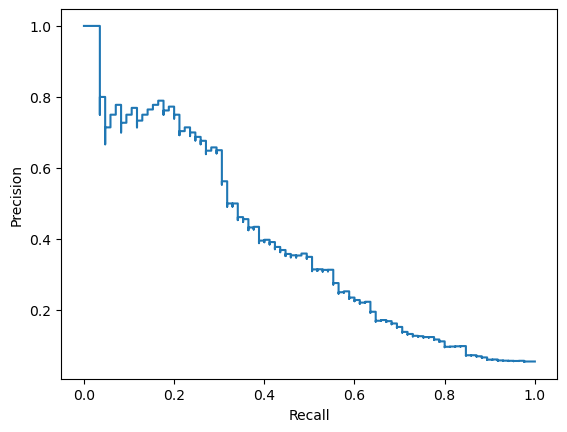

In [6]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.420521,0.650000,0.305882,0.416000,0.952812,0.384845
bert-base-uncased-dot,60.790268,0.392157,0.470588,0.427807,0.930834,0.355622
bert-base-uncased-euc,7.212177,0.216418,0.341176,0.264840,0.895928,0.169549


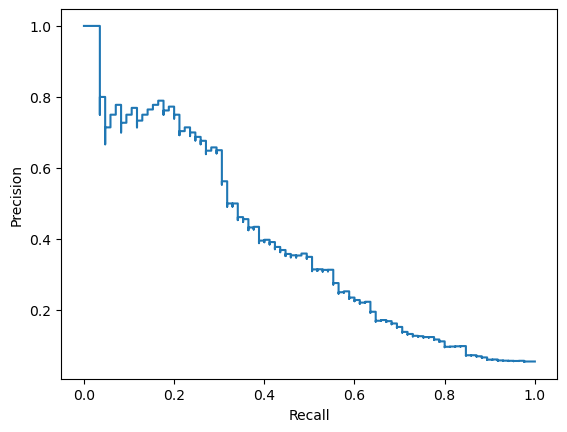

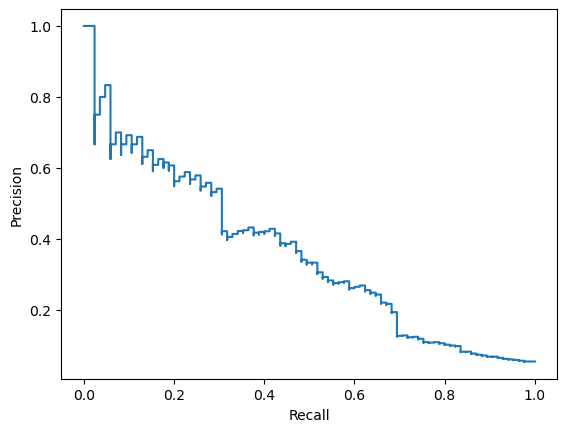

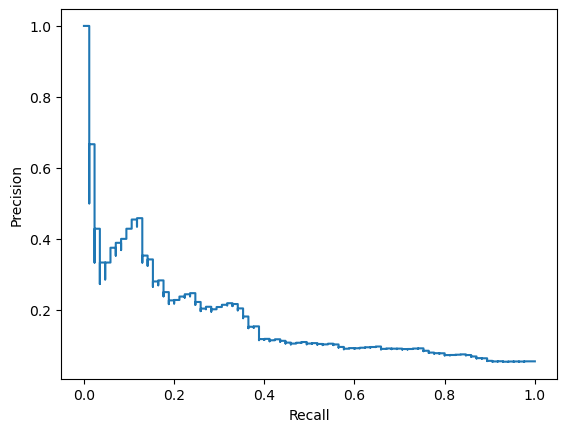

In [7]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)